<a href="https://colab.research.google.com/github/engAziz04/SWE485-Project-Group2/blob/main/phase1_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1 — Problem Understanding & Data Exploration
**Project:** Student Performance Predictor — Group 2  
**Date:** 2025-10-16

This notebook fulfills SWE485 Phase 1 requirements: Dataset Goal & Source, General Info, Summary & Visualization, and Preprocessing (with justifications).

## 1) Dataset Goal & Source
**Goal:** Predict pass/fail or final grade (`G3`) and derive simple study advice.

**Source:**
Kaggle dataset typically provides two files:
- `student-mat.csv` (Math course)
- `student-por.csv` (Portuguese course)

You may also provide a single unified file named `student_performance.csv`.

In [1]:
# ===== Clone the project repository so Colab can access the Dataset folder =====
!rm -rf SWE485-Project-Group2
!git clone https://github.com/engAziz04/SWE485-Project-Group2.git
%cd SWE485-Project-Group2

# (Optional) Display the contents of the Dataset folder to confirm that the file exists
!ls -la Dataset | head

# =========== Setup & Imports ===========
import os, pandas as pd, numpy as np
import matplotlib.pyplot as plt

DATA_DIR = "./Dataset"
CANDIDATES = [
    os.path.join(DATA_DIR, "student_performance.csv"),
    os.path.join(DATA_DIR, "student-mat.csv"),
    os.path.join(DATA_DIR, "student-por.csv"),
]

existing = [p for p in CANDIDATES if os.path.exists(p)]
assert os.path.exists(DATA_DIR), "Please create a /Dataset folder next to this notebook."
assert len(existing) > 0, "Please place a CSV file in /Dataset: student_performance.csv OR student-mat.csv / student-por.csv"
print("✅ Found files:", existing)



Cloning into 'SWE485-Project-Group2'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 44 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 140.14 KiB | 2.16 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/SWE485-Project-Group2
total 20
drwxr-xr-x 2 root root 4096 Oct 18 17:31 .
drwxr-xr-x 7 root root 4096 Oct 18 17:31 ..
-rw-r--r-- 1 root root    1 Oct 18 17:31 .gitkeep
-rw-r--r-- 1 root root 5478 Oct 18 17:31 student_performance.csv
✅ Found files: ['./Dataset/student_performance.csv']


In [2]:
# ============ Load Data ============
def load_student_data(paths):
    dfs = []
    for p in paths:
        if os.path.exists(p):
            try:
                df = pd.read_csv(p, sep=',')  # most versions are comma-separated
            except Exception:
                df = pd.read_csv(p, sep=';')  # fallback for semicolon-separated
            df['__source__'] = os.path.basename(p)
            dfs.append(df)
    if not dfs:
        raise FileNotFoundError("No valid CSV found.")
    # Align common columns if multiple files exist, then concatenate
    base_cols = set(dfs[0].columns)
    for i in range(1, len(dfs)):
        base_cols = base_cols.intersection(set(dfs[i].columns))
    dfs = [d[list(sorted(base_cols))].copy() for d in dfs]
    return pd.concat(dfs, ignore_index=True)

df = load_student_data(existing)
print("Shape:", df.shape)
df.head()

Shape: (50, 34)


,Dalc,Fedu,Fjob,G1,G2,G3,Medu,Mjob,Pstatus,Walc,...,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime
0,1,4,other,2,6,19,0,services,A,5,...,no,yes,no,course,no,MS,no,M,1,4
1,3,0,teacher,13,17,6,4,health,T,5,...,no,no,yes,home,yes,GP,no,F,4,3
2,1,2,health,18,10,15,1,health,A,1,...,no,no,no,home,yes,GP,no,M,2,2
3,4,3,teacher,4,12,14,0,teacher,T,5,...,no,no,yes,reputation,yes,GP,no,M,4,2
4,1,1,at_home,16,7,19,1,health,A,2,...,yes,yes,yes,reputation,yes,MS,yes,M,3,4


## 2) General Information
- Observations & features
- Data types
- Target variable: `G3` (final grade) or derived `passed`.

In [3]:
print("Rows, Cols:", df.shape)
print("\nData Types:")
print(df.dtypes.value_counts())
print("\nColumn Dtypes:")
print(df.dtypes)
df.sample(min(5, len(df)))

Rows, Cols: (50, 34)

Data Types:
object    18
int64     16
Name: count, dtype: int64

Column Dtypes:
Dalc           int64
Fedu           int64
Fjob          object
G1             int64
G2             int64
G3             int64
Medu           int64
Mjob          object
Pstatus       object
Walc           int64
__source__    object
absences       int64
activities    object
address       object
age            int64
failures       int64
famrel         int64
famsize       object
famsup        object
freetime       int64
goout          int64
guardian      object
health         int64
higher        object
internet      object
nursery       object
paid          object
reason        object
romantic      object
school        object
schoolsup     object
sex           object
studytime      int64
traveltime     int64
dtype: object


,Dalc,Fedu,Fjob,G1,G2,G3,Medu,Mjob,Pstatus,Walc,...,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime
14,1,2,other,4,13,2,1,health,A,3,...,no,no,no,reputation,no,MS,yes,F,1,4
25,4,0,services,6,15,13,4,other,A,2,...,yes,yes,no,other,no,GP,no,M,4,1
8,1,1,teacher,5,17,19,4,at_home,A,3,...,no,no,no,other,no,GP,yes,M,1,3
1,3,0,teacher,13,17,6,4,health,T,5,...,no,no,yes,home,yes,GP,no,F,4,3
3,4,3,teacher,4,12,14,0,teacher,T,5,...,no,no,yes,reputation,yes,GP,no,M,4,2


In [4]:
# ============ Set Target Column ============
TARGET = None
for cand in ['G3', 'final_grade', 'Grade', 'grade']:
    if cand in df.columns:
        TARGET = cand
        break

if TARGET is None:
    # Create a binary 'passed' if a numeric grade exists
    for gcol in ['G3', 'final_grade', 'Grade', 'grade']:
        if gcol in df.columns and pd.api.types.is_numeric_dtype(df[gcol]):
            median_val = df[gcol].median()
            df['passed'] = (df[gcol] >= median_val).astype(int)
            TARGET = 'passed'
            print(f"Derived TARGET 'passed' from {gcol} using median={median_val:.2f}")
            break

if TARGET is None:
    raise ValueError("Please set TARGET manually to an existing column.")

print("TARGET =", TARGET)

TARGET = G3


## 3) Summary & Visualization
- Statistical summaries
- Missing values
- Distributions and (if applicable) class balance

In [5]:
# Statistical summary
df.describe(include='all').transpose().fillna('')

/tmp/ipython-input-1825402610.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.describe(include='all').transpose().fillna('')


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dalc,50.0,,,,2.76,1.505907,1.0,1.0,3.0,4.0,5.0
Fedu,50.0,,,,1.98,1.463711,0.0,1.0,2.0,3.0,4.0
Fjob,50.0,5,other,12,,,,,,,
G1,50.0,,,,9.68,5.669251,0.0,5.0,10.0,14.0,19.0
G2,50.0,,,,9.98,6.156099,0.0,4.25,9.5,16.0,19.0
G3,50.0,,,,10.7,6.389564,0.0,5.25,12.0,16.75,19.0
Medu,50.0,,,,1.74,1.454199,0.0,0.25,1.5,3.0,4.0
Mjob,50.0,5,other,14,,,,,,,
Pstatus,50.0,2,T,31,,,,,,,
Walc,50.0,,,,3.2,1.355262,1.0,2.0,3.0,4.0,5.0


In [6]:
# Missing values overview
missing = df.isna().sum().sort_values(ascending=False)
missing[missing>0]

,0


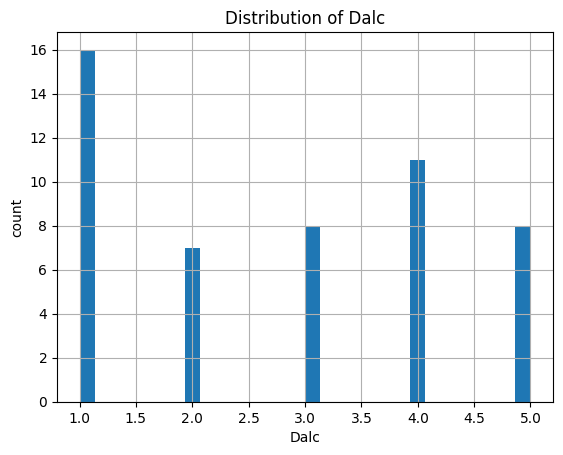

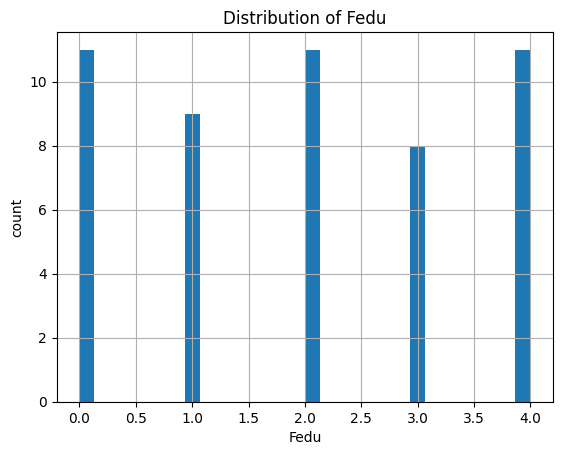

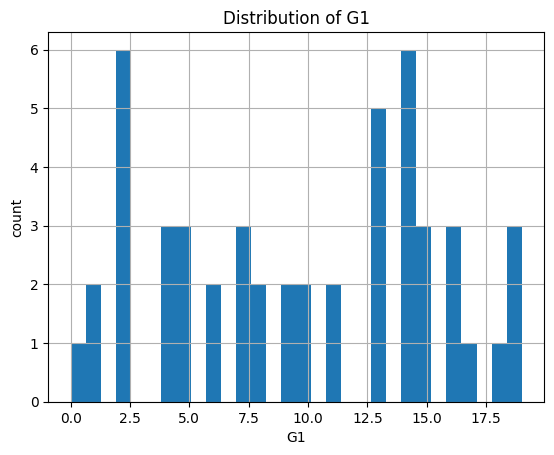

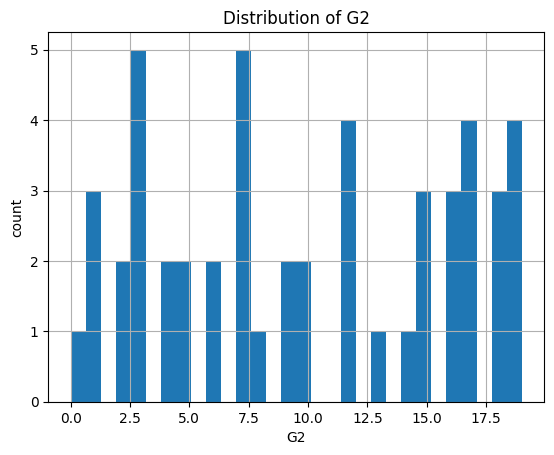

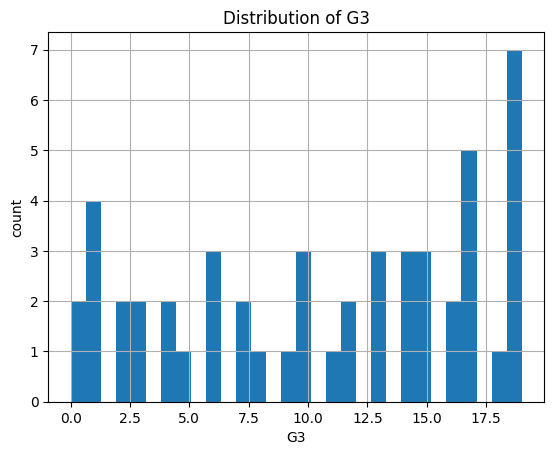

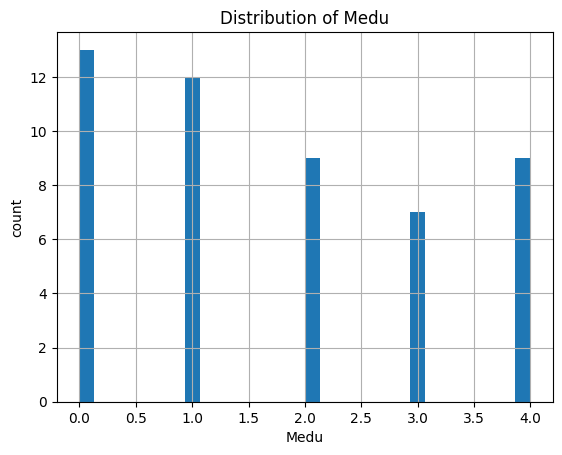

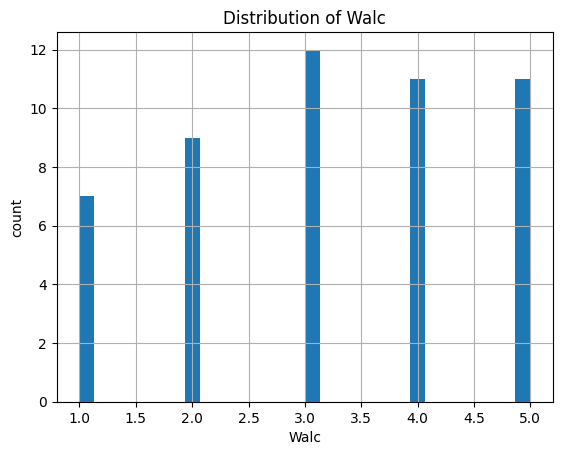

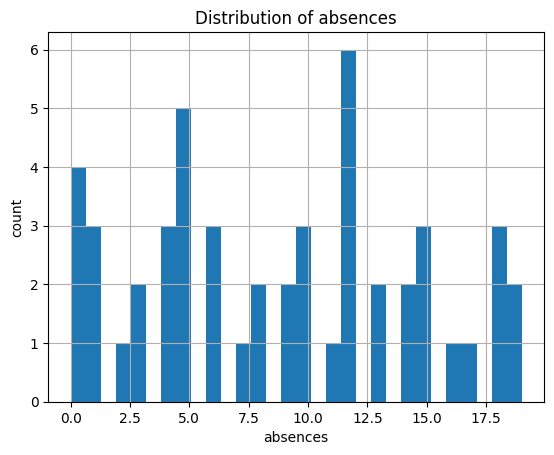

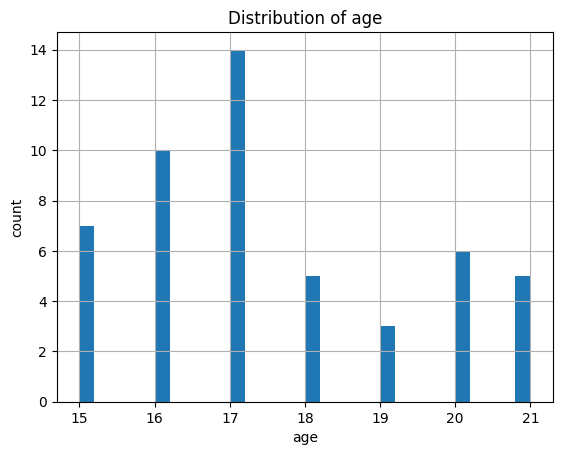

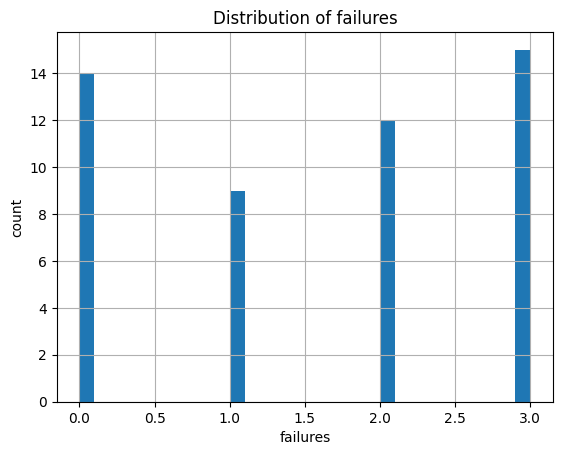

In [7]:
# Distributions for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols[:10]:  # cap to first 10
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("count")
    plt.show()

# Class balance if we have a categorical/binary target
if TARGET in df.columns and not pd.api.types.is_numeric_dtype(df[TARGET]):
    plt.figure()
    df[TARGET].value_counts().plot(kind='bar')
    plt.title(f"Class Balance: {TARGET}")
    plt.xlabel("Class"); plt.ylabel("count")
    plt.show()
elif TARGET == 'passed':
    plt.figure()
    df['passed'].value_counts().plot(kind='bar')
    plt.title("Class Balance: passed")
    plt.xlabel("Class"); plt.ylabel("count")
    plt.show()

## 4) Preprocessing Techniques (with justifications)
Document what you changed and why:
- Handle missing values: drop/fill/impute.
- Encode categoricals: One-Hot Encoding.
- Scale numeric features if needed.
- Remove/transform outliers if needed.

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

X = df.drop(columns=[c for c in [TARGET] if c in df.columns]) if TARGET else df.copy()
y = df[TARGET] if TARGET in df.columns else None

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
    ],
    remainder='drop'
)

X_processed = preprocessor.fit_transform(X)
print("Processed shape:", X_processed.shape)
print("Num features:", len(num_features), "| Cat features:", len(cat_features))

# Optional scaling step example:
# scaler = StandardScaler(with_mean=False)
# X_processed = scaler.fit_transform(X_processed)

Processed shape: (50, 33)
Num features: 15 | Cat features: 18


## 5) Notes & Next Steps
- Summarize key findings.
- List data issues or open questions.
- Plan candidate models for Phase 2 (e.g., Decision Tree, SVM).